In [ ]:
# Install the Kaggle package
!pip install -q kaggle

# Set up the Kaggle configuration
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 /content/kaggle.json

# Download the dataset
!kaggle datasets download -d preatcher/standard-ocr-dataset

chmod: cannot access '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/preatcher/standard-ocr-dataset
License(s): CC0-1.0
100% 46.2M/46.2M [00:03<00:00, 20.7MB/s]
100% 46.2M/46.2M [00:03<00:00, 14.6MB/s]


In [ ]:
import zipfile
import os

# Ekstrak file zip
with zipfile.ZipFile("/content/standard-ocr-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("/content/standard-ocr-dataset")

# List isi direktori
print("Isi direktori:")
print(os.listdir("/content/standard-ocr-dataset"))

Isi direktori:
['data', 'data2']


model

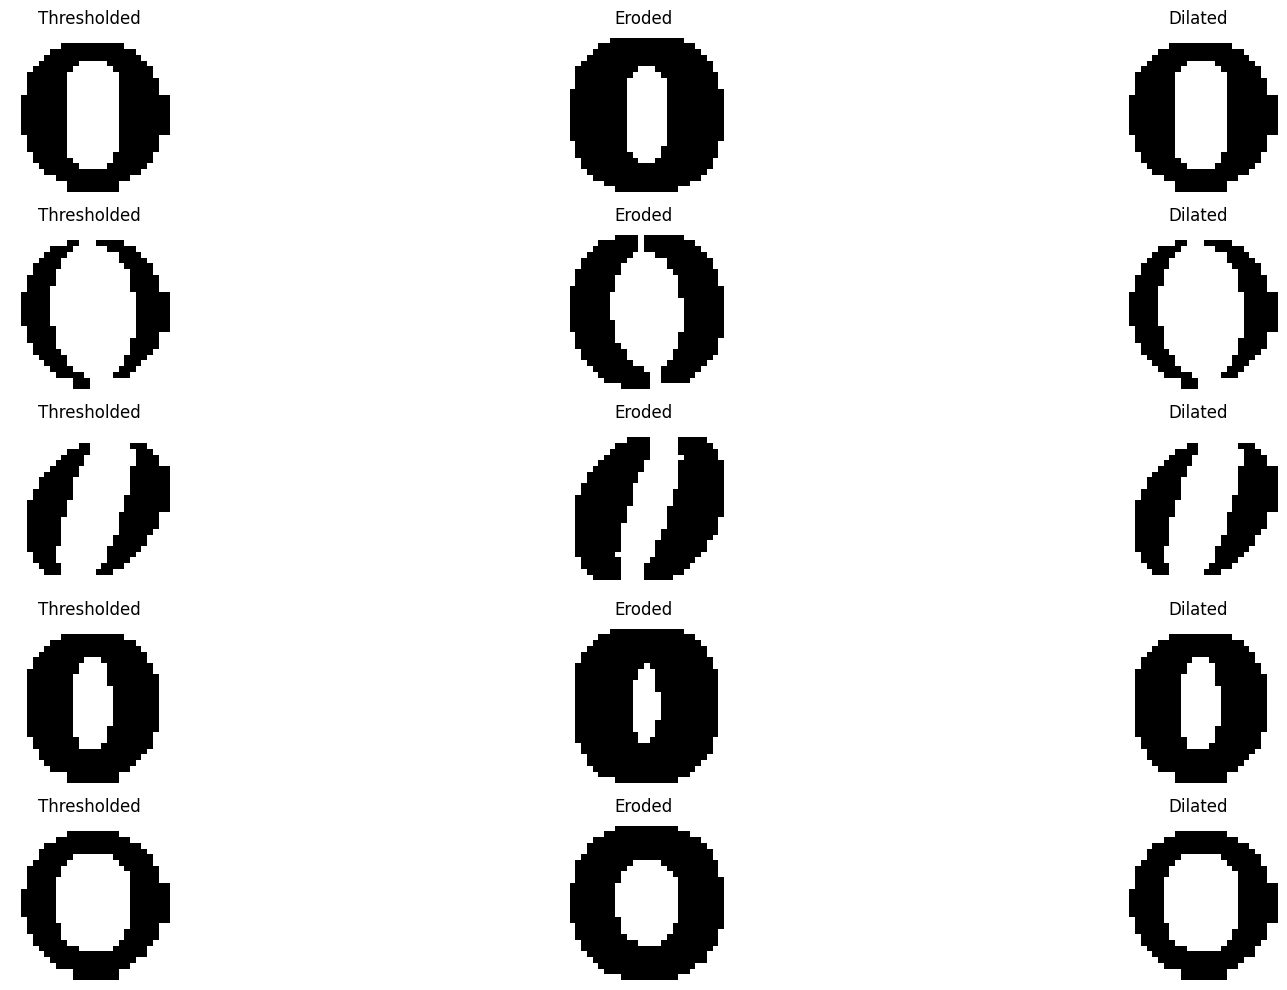

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tampilkan_gambar(folder, image_size=(28, 28)):
    images = [] # inisialisasi list kosong
    labels = []
    label_dict = {}
    label_idx = 0

    # iterasi melalui folder-label dan file-file gambar di dalamnya.
    for label in sorted(os.listdir(folder)):
        label_dict[label_idx] = label
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # gambar dibaca dalam format greyscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:

                # setiap gambar diubah ukurannya menjadi ukuran yang diberikan (28x28 piksel)
                img_resize = cv2.resize(img, image_size)

                # nilai piksel di normalisasi ke dalam rentang [0, 1]
                img_normalized = img_resize / 255.0

                # gambar diubah menjadi tipe data bilangan bulat 8-bit unsigned integer.
                img_uint8 = np.uint8(img_normalized * 255)

                # thresholding : Metode Otsu digunakan untuk menentukan nilai threshold yang optimal untuk mengubah gambar menjadi citra biner.
                _, img_thresholded = cv2.threshold(img_uint8, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

                # erosi dan dilasi dilakukan untuk membersihkan dan memperbaiki citra biner.
                img_eroded = cv2.erode(img_thresholded, kernel=np.ones((3, 3), np.uint8), iterations=1)
                img_dilated = cv2.dilate(img_eroded, kernel=np.ones((3, 3), np.uint8), iterations=1)

                # tiap gambar yang telah di pre proses disimpan dalam array images, sedangkan label-labelnya disimpan dalam array labels.
                images.append(img_dilated)
                labels.append(label_idx)
        label_idx += 1
    return np.array(images), np.array(labels), label_dict

banyaknya_gambar= 5
plt.figure(figsize=(20, 10))
for i in range(banyaknya_gambar):

    img_thresholded = X_train[i]
    plt.subplot(5, 3, 3*i+1)
    plt.imshow(img_thresholded, cmap='gray')
    plt.title("Thresholded")
    plt.axis('off')

    img_eroded = cv2.erode(img_thresholded, kernel=np.ones((3, 3), np.uint8), iterations=1)
    plt.subplot(5, 3, 3*i+2)
    plt.imshow(img_eroded, cmap='gray')
    plt.title("Eroded")
    plt.axis('off')

    img_dilated = cv2.dilate(img_eroded, kernel=np.ones((3, 3), np.uint8), iterations=1)
    plt.subplot(5, 3, 3*i+3)
    plt.imshow(img_dilated, cmap='gray')
    plt.title("Dilated")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
X_train, y_train, label_dict_train = tampilkan_gambar("/content/standard-ocr-dataset/data/training_data")
# variabel label_dict_train : kamus yang memetakan indeks label ke nama labelnya untuk setiap kelas dalam data pelatihan

X_test, y_test, label_dict_test = tampilkan_gambar("/content/standard-ocr-dataset/data/testing_data")

print("Data training:")
print("Jumlah gambar:", len(X_train))
print("Jumlah label:", len(y_train))
print("Label dictionary:", label_dict_train)
print()

print("Data testing:")
print("Jumlah gambar:", len(X_test))
print("Jumlah label:", len(y_test))
print("Label dictionary:", label_dict_test)

Data training:
Jumlah gambar: 20628
Jumlah label: 20628
Label dictionary: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}

Data testing:
Jumlah gambar: 1008
Jumlah label: 1008
Label dictionary: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred = knn_model.predict(X_test.reshape(len(X_test), -1))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Gambar dalam variabel X_train direpresentasikan sebagai matriks dua dimensi. Namun, model k-NN memerlukan input berupa array satu dimensi (vektor)

Ukuran gambar datanya adalah 28x28 piksel, maka setiap gambar memiliki 28 baris dan 28 kolom, sehingga ketika direpresentasikan sebagai array dua dimensi, akan memiliki dimensi (28, 28). Dengan melakukan reshape menjadi array satu dimensi dengan X_train.reshape(len(X_train), -1), setiap gambar akan direpresentasikan sebagai array dengan panjang 28x28 = 784 elemen.


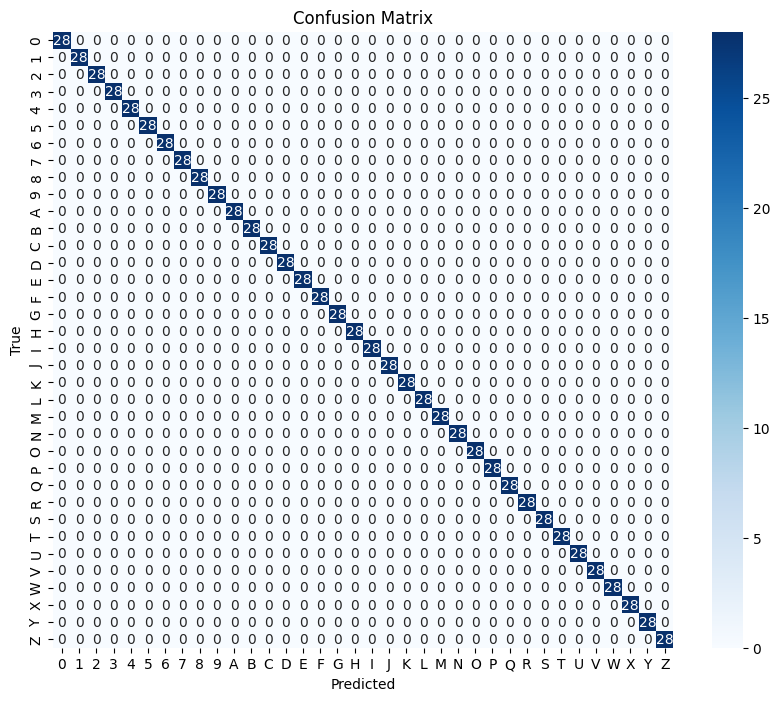

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_dict_test.values(), yticklabels=label_dict_test.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_dict_test.values()))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        28
           A       1.00      1.00      1.00        28
           B       1.00      1.00      1.00        28
           C       1.00      1.00      1.00        28
           D       1.00      1.00      1.00        28
           E       1.00      1.00      1.00        28
           F       1.00      1.00      1.00        28
           G       1.00      1.00      1.00        28
    

In [ ]:
import pickle

model_filename = 'knn_modell.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(knn_model, f)
print("Model telah disimpan sebagai", model_filename)


Model telah disimpan sebagai knn_modell.pkl


TESTING


In [ ]:
# Install the Kaggle package
!pip install -q kaggle

# Set up the Kaggle configuration
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 /content/kaggle.json

# Download the dataset
!kaggle datasets download -d aslanahmedov/number-plate-detection

chmod: cannot access '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/aslanahmedov/number-plate-detection
License(s): copyright-authors
100% 411M/413M [00:20<00:00, 21.6MB/s]
100% 413M/413M [00:20<00:00, 21.3MB/s]


In [ ]:
import os
import shutil
import zipfile
# Ekstrak file zip
with zipfile.ZipFile("/content/number-plate-detection.zip", "r") as zip_ref:
    zip_ref.extractall("/content/number-plate-detection")

print("Isi direktori:")
print(os.listdir("/content/number-plate-detection"))

images_folder = "/content/number-plate-detection/images"
labels_folder = os.path.join(images_folder, "labels")
data_folder = os.path.join(images_folder, "data")

# Buat folder label
if not os.path.exists(labels_folder):
    os.makedirs(labels_folder)
    print("Folder 'labels' berhasil dibuat.")

# Buat folder data
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    print("Folder 'data' berhasil dibuat.")

# Iterasi melalui setiap file gambar dalam folder gambar
for file_name in os.listdir(images_folder):
    if file_name.endswith(".xml"):
        # Buat path lengkap untuk file gambar dan label
        image_path = os.path.join(images_folder, file_name)
        label_path = os.path.join(labels_folder, file_name)

        # Copy file gambar ke folder label
        shutil.copy(image_path, label_path)
        print(f"File '{file_name}' berhasil disalin ke folder label.")

    elif file_name.endswith((".jpg", ".jpeg")):
        # Buat path lengkap untuk file gambar dan label
        image_path = os.path.join(images_folder, file_name)
        data_path = os.path.join(data_folder, file_name)

        # Copy file gambar ke folder data
        shutil.copy(image_path, data_path)
        print(f"File '{file_name}' berhasil disalin ke folder data.")
print("Proses penyalinan selesai.")

Isi direktori:
['data.yaml', 'TEST', 'images']
Folder 'labels' berhasil dibuat.
Folder 'data' berhasil dibuat.
File 'N176.jpeg' berhasil disalin ke folder data.
File 'N65.xml' berhasil disalin ke folder label.
File 'N169.xml' berhasil disalin ke folder label.
File 'N229.xml' berhasil disalin ke folder label.
File 'N200.xml' berhasil disalin ke folder label.
File 'N94.jpeg' berhasil disalin ke folder data.
File 'N170.jpeg' berhasil disalin ke folder data.
File 'N200.jpeg' berhasil disalin ke folder data.
File 'N211.jpeg' berhasil disalin ke folder data.
File 'N43.jpeg' berhasil disalin ke folder data.
File 'N84.jpeg' berhasil disalin ke folder data.
File 'N213.xml' berhasil disalin ke folder label.
File 'N217.jpeg' berhasil disalin ke folder data.
File 'N93.jpeg' berhasil disalin ke folder data.
File 'N24.xml' berhasil disalin ke folder label.
File 'N152.jpeg' berhasil disalin ke folder data.
File 'N216.jpeg' berhasil disalin ke folder data.
File 'N167.xml' berhasil disalin ke folder la

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
from keras.models import load_model
import joblib

# load pre-trained model character recognition
ocr_model = joblib.load('/content/knn_modell.pkl')

# membaca label dari file XML
def baca_label(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    labels = []
    # dalam setiap iterasi, informasi label seperti nama kelas (class_name) dan koordinat bounding box (xmin, ymin, xmax, ymax) diambil dari elemen XML yang sesuai.
    for obj in root.findall('object'):
        class_name = obj.find('name').text

        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        # informasi label untuk setiap objek disimpan dalam bentuk tupel dan disimpan ke list labels
        labels.append((class_name, xmin, ymin, xmax, ymax))
    return labels

Fungsi ET.parse(xml_file) dari modul xml.etree.ElementTree digunakan untuk membaca file XML dan membuat objek pohon elemen yang merepresentasikan struktur XML.

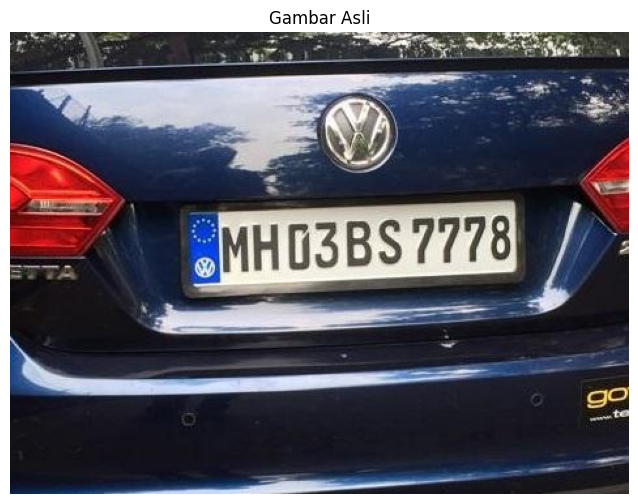

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_ori = cv2.imread('/content/number-plate-detection/images/data/N99.jpeg')

# Mengonversi warna gambar dari BGR ke RGB
img_rgb = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
height, width, channel = img_ori.shape
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()


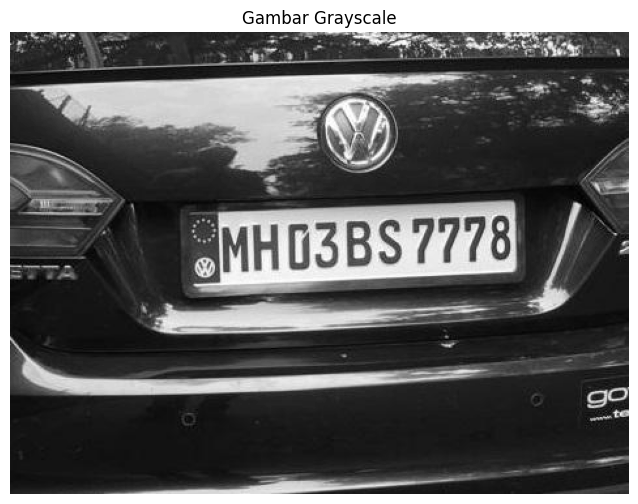

In [ ]:
# mengonversi gambar ke grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Gambar Grayscale')
plt.show()

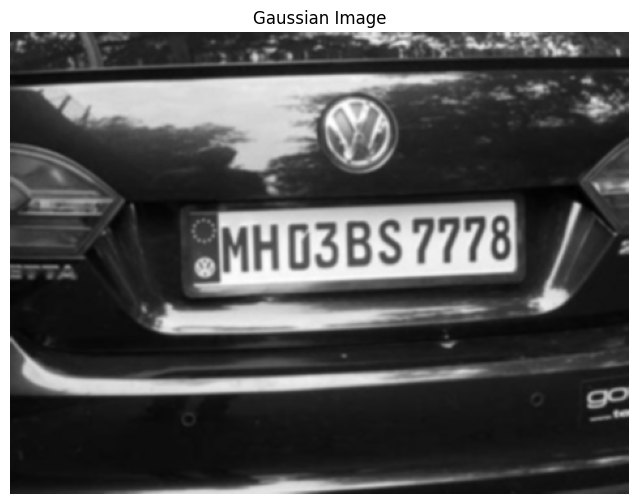

In [ ]:
# mengaburkan gambar menggunakan GaussianBlur untuk mengurangi noise

# nilai ksize (atau kernel size) (5, 5)
# kernel yang digunakan memiliki dimensi 5x5. Ini berarti bahwa dalam proses blurring, setiap piksel akan dipengaruhi oleh nilai piksel di sekitarnya dalam jarak 5 piksel.

# parameter sigmaX adalah parameter yang mengontrol dispersi gaussian.
# semakin besar nilai sigmaX, semakin besar efek blurring yang dihasilkan.

img_blurred = cv2.GaussianBlur(img_gray, ksize=(5, 5), sigmaX=0)
plt.figure(figsize=(8, 6))
plt.imshow(img_blurred, cmap='gray')
plt.axis('off')
plt.title('Gaussian Image')
plt.show()

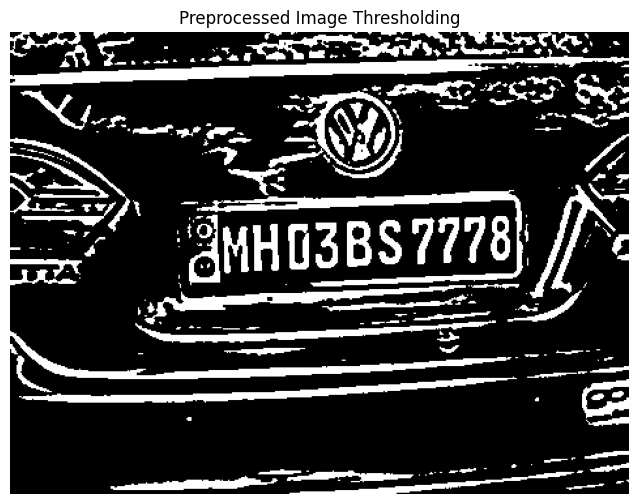

In [ ]:
# menggunakan adaptive thresholding
img_processed = cv2.adaptiveThreshold(
    img_blurred,

    # parameter maxValue: nilai maksimum yang akan diberikan pada piksel yang melewati ambang batas.
    maxValue=255.0,

    # parameter adaptiveMethod:  metode yang digunakan untuk menghitung nilai ambang batas adaptif.
    # menggunakan cv2.ADAPTIVE_THRESH_GAUSSIAN_C, yang berarti bahwa nilai ambang batas dihitung sebagai rata-rata tertimbang di sekitar setiap piksel menggunakan kernel Gaussian.
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,

    # cv2.THRESH_BINARY_INV digunakan untuk menghasilkan citra biner di mana piksel di atas ambang batas akan diubah menjadi hitam (0) dan piksel di bawah ambang batas akan diubah menjadi putih (255).
    thresholdType=cv2.THRESH_BINARY_INV,

    # nilai ambang batas dihitung dengan menggunakan rata-rata tertimbang dari intensitas piksel dalam area tertentu di sekitar setiap piksel, yang ditentukan oleh blockSize.
    # selain itu, konstanta C juga ditambahkan atau dikurangkan dari rata-rata tersebut untuk menyesuaikan nilai ambang batas. Semakin besar nilai C, semakin besar pengaruhnya terhadap nilai ambang batas.

    blockSize=19, # menghitung nilai ambang batas menggunakan area 19x19 piksel di sekitar setiap piksel.
    C=9
)
# nilai ambang batas dalam thresholding adaptif adalah nilai yang digunakan untuk membedakan antara piksel objek dan latar belakang dalam gambar.

plt.figure(figsize=(8, 6))
plt.imshow(img_processed, cmap='gray')
plt.axis('off')
plt.title('Preprocessed Image Thresholding')
plt.show()

Dilasi: Memperluas area objek dalam citra dengan struktur tertentu yang disebut kernel atau elemen struktur. Dilasi digunakan untuk mengisi celah-celah kecil dalam objek, menghubungkan objek terpisah, atau memperbesar dimensi objek.

Erosi: Mengurangi area objek dalam citra dengan struktur yang sama seperti dilasi. Erosi digunakan untuk menghilangkan noise, memisahkan objek yang saling melekat, atau mengurangi dimensi objek.

1. **Dilasi**:
   - Dilasi digunakan untuk menambahkan atau memperluas wilayah piksel yang bernilai 1 (putih) dalam gambar biner.
   - Proses dilasi dilakukan dengan menggunakan fungsi `cv2.dilate()` yang mengambil tiga argumen: gambar yang akan diproses, kernel yang digunakan untuk dilasi, dan jumlah iterasi yang menentukan seberapa besar efek dilasi yang akan dilakukan.
   - Pada contoh ini, dilakukan dilasi pada gambar hasil proses thresholding adaptif (`img_processed`) menggunakan kernel `np.ones((3, 3), np.uint8)` yang berukuran 3x3 piksel dengan tipe data unsigned integer 8-bit. Iterasi dilakukan sebanyak satu kali (`iterations=1`).
   - Hasil dilasi disimpan dalam variabel `img_dilated`.

2. **Erosi**:
   - Erosi adalah operasi morfologi citra yang digunakan untuk mengurangi wilayah piksel yang bernilai 1 (putih) dalam gambar biner.
   - Pada contoh ini, dilakukan erosi pada gambar hasil dilasi sebelumnya (`img_dilated`) menggunakan kernel yang sama dengan kernel dilasi, yaitu `np.ones((3, 3), np.uint8)`, dan iterasi dilakukan sebanyak satu kali.
   - Hasil erosi disimpan dalam variabel `img_eroded`.

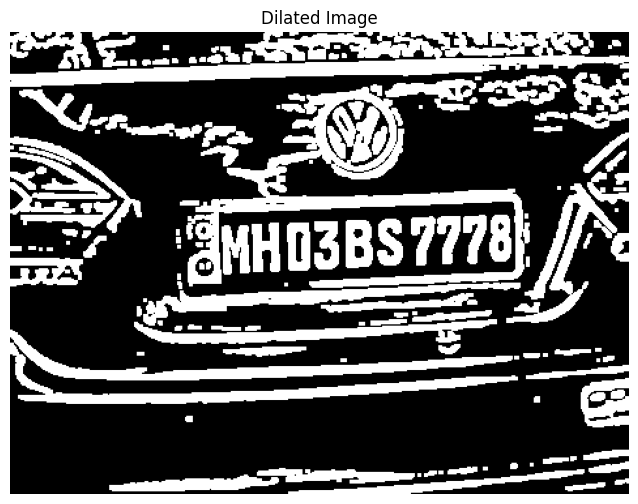

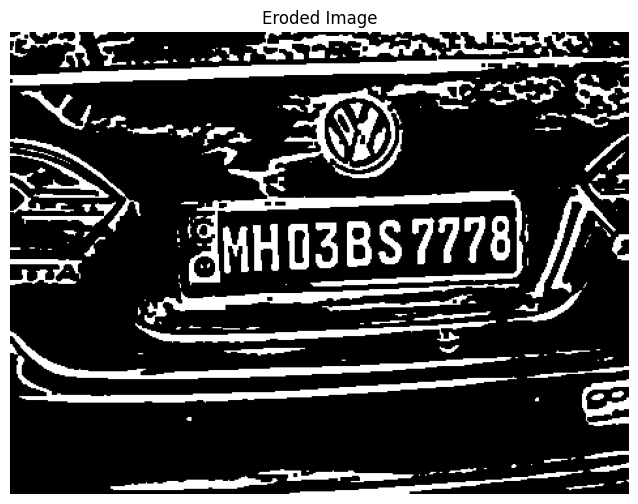

In [ ]:
kernel = np.ones((3, 3), np.uint8)

# proses dilasi
img_dilated = cv2.dilate(img_processed, kernel, iterations=1)

plt.figure(figsize=(8, 6))
plt.imshow(img_dilated, cmap='gray')
plt.axis('off')
plt.title('Dilated Image')
plt.show()

# proses erosi
img_eroded = cv2.erode(img_dilated, kernel, iterations=1)

plt.figure(figsize=(8, 6))
plt.imshow(img_eroded, cmap='gray')
plt.axis('off')
plt.title('Eroded Image')
plt.show()

1. **`cv2.findContours()`**: Fungsi ini digunakan untuk menemukan kontur dalam gambar biner.
   - Parameter pertama (`img_dilated`) adalah gambar biner di mana kontur akan dicari.
   - Parameter `mode` (`cv2.RETR_LIST`) setiap kontur yang ditemukan akan dianggap sebagai kontur yang independen, tanpa memperhatikan hubungan hierarkis antara kontur-kontur tersebut.
   - Parameter `method` (`cv2.CHAIN_APPROX_SIMPLE`) menentukan metode pendekatan untuk menyimpan kontur. `CHAIN_APPROX_SIMPLE` mengkompresi kontur dengan menggunakan pendekatan yang sederhana dan menghilangkan titik-titik yang tidak relevan untuk menghemat memori.

2. **Menggambar Kontur**: Kontur yang ditemukan kemudian digambar pada gambar hitam kosong (`temp_result`) menggunakan fungsi `cv2.drawContours()`.
   - `temp_result` adalah gambar kosong dengan ukuran yang sama dengan gambar asli.
   - Kontur yang ditemukan disimpan dalam variabel `contours`.
   - `contourIdx=-1` menandakan bahwa semua kontur yang ditemukan akan digambar.
   - `color=(255, 255, 255)` adalah warna putih yang digunakan untuk menggambar kontur.

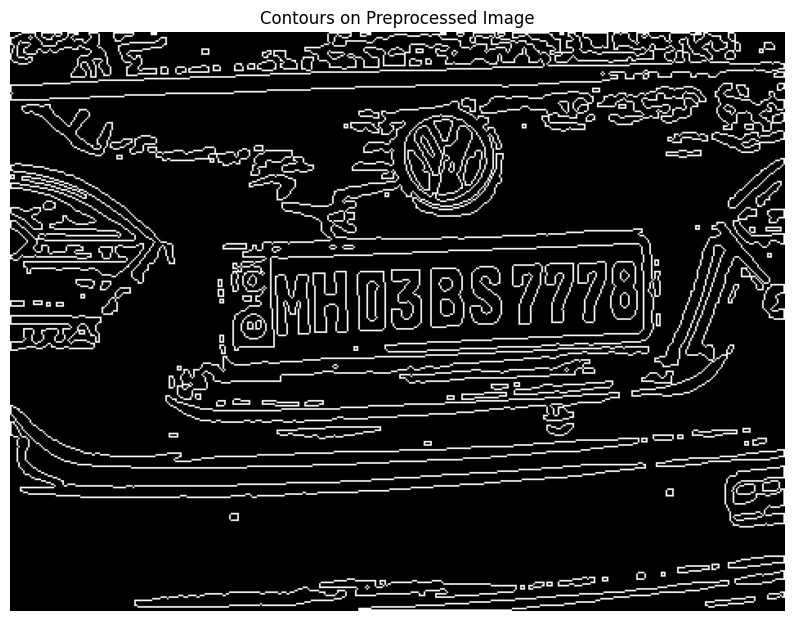

In [ ]:
# menemukan dan menampilkan kontur pada gambar yang telah diproses
contours, _ = cv2.findContours(
    img_dilated,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))
plt.figure(figsize=(10, 8))
plt.imshow(temp_result)
plt.axis('off')
plt.title('Contours on Preprocessed Image')
plt.show()

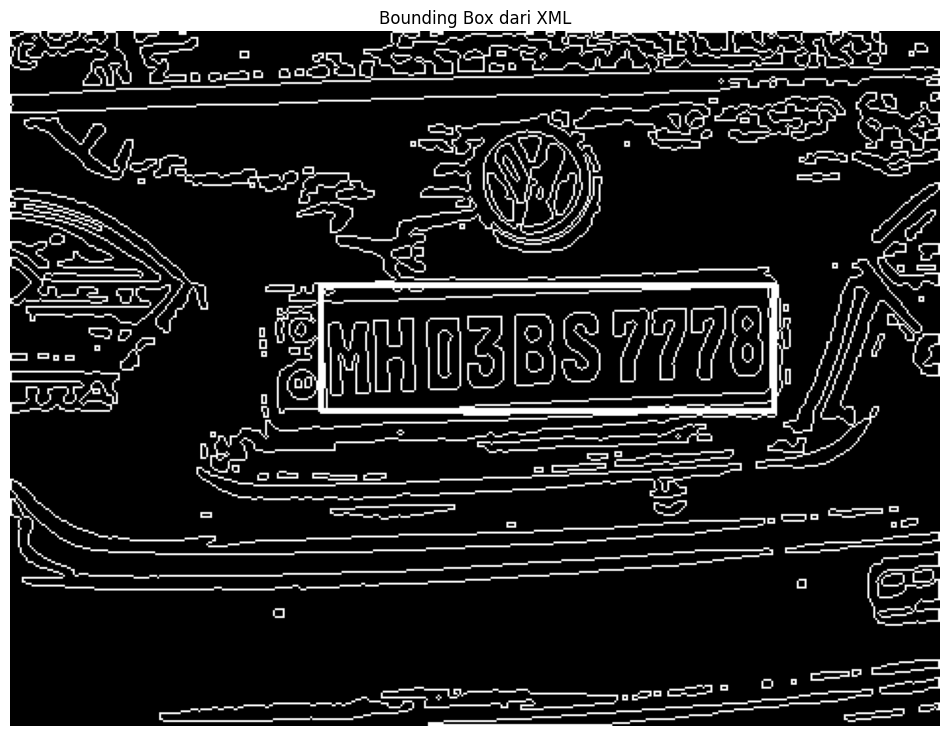

In [ ]:
# Membaca label dari file XML
labels = baca_label('/content/number-plate-detection/images/labels/N99.xml')

# Menempelkan bounding box ke gambar yang sudah di-contour
for label in labels:
    class_name, xmin, ymin, xmax, ymax = label

    # pt1: titik koordinat (x, y) untuk sudut atas kiri dari kotak pembatas
    # pt2: titik koordinat (x, y) untuk sudut bawah kanan dari kotak pembatas.
    cv2.rectangle(temp_result, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)
plt.axis('off')
plt.title('Bounding Box dari XML')
plt.show()

Membuat gambar kosong (temp_result) dengan ukuran yang sama dengan gambar asli, yang digunakan untuk menggambar kontur.

**Penghitungan Attribut Kontur**: Untuk setiap kontur, dihitung atribut-atribut seperti koordinat kotak pembatas (`x`, `y`, `w`, `h`), luas area (`area`), dan rasio lebar terhadap tinggi (`ratio`).

**Penyaringan Kontur**: Kontur akan disaring berdasarkan beberapa kriteria yang telah ditetapkan sebelumnya:
   - Luas area (`area`) harus lebih besar dari `MIN_AREA`.
   - Lebar (`w`) dan tinggi (`h`) dari kotak pembatas harus lebih besar dari `MIN_WIDTH` dan `MIN_HEIGHT` secara berturut-turut.
   - Rasio lebar terhadap tinggi (`ratio`) harus berada di antara `MIN_RATIO` dan `MAX_RATIO`.
   - Tinggi karakter (`h`) harus lebih besar dari `MIN_CHAR_HEIGHT`.
   
**Pengecekan Posisi Kontur**: Dilakukan pengecekan apakah kontur berada di dalam area plat nomor dengan memeriksa apakah koordinat x dan y kontur berada di dalam batas yang ditetapkan oleh label dari file XML.
   
**Penambahan Bounding Box**: Jika kontur memenuhi semua kriteria di atas dan berada di dalam area plat nomor, maka kotak pembatasnya ditambahkan ke dalam daftar `bounding_boxes`, dengan luas area sebagai kunci.

x: koordinat horizontal (sumbu X) dari titik awal (sudut kiri atas)

y: koordinat vertikal (sumbu Y) dari titik awal (sudut kiri atas)

w: lebar dari suatu objek atau kotak pembatas yang mengelilinginya.

h: tinggi dari suatu objek atau kotak pembatas yang mengelilinginya.

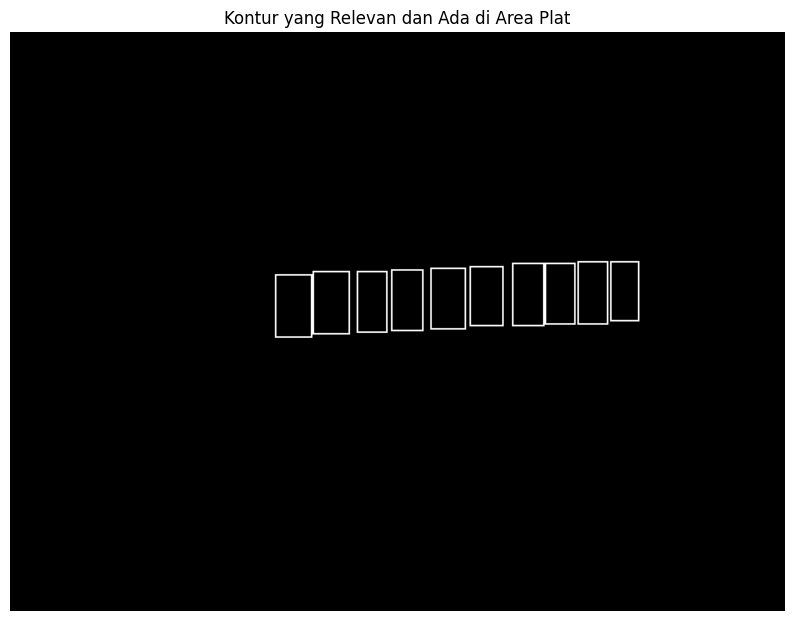

In [ ]:
MIN_AREA = 10 # Luas minimum kontur
MIN_WIDTH, MIN_HEIGHT = 1, 1 # Lebar dan tinggi minimum kontur
MIN_RATIO, MAX_RATIO = 0.1, 10.0 # Rasio lebar terhadap tinggi minimum dan maksimum
MIN_CHAR_HEIGHT = 10 # Tinggi minimum karakter

labels = baca_label('/content/number-plate-detection/images/labels/N99.xml')

# menyimpan bounding box yang akan digambar
bounding_boxes = {}

# menampilkan kontur yang ada di area plat
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    ratio = w / h
    if area > MIN_AREA and w > MIN_WIDTH and h > MIN_HEIGHT and MIN_RATIO < ratio < MAX_RATIO and h > MIN_CHAR_HEIGHT:

        # Iterasi melalui setiap label dalam labels.
        # Mengambil nilai dari setiap label, yaitu class_name, xmin (koordinat x minimum), ymin (koordinat y minimum), xmax (koordinat x maksimum), dan ymax (koordinat y maksimum).
        # periksa apakah koordinat titik kiri atas (x, y) dari kotak pembatas yang dihasilkan oleh fungsi cv2.boundingRect() berada di dalam kotak pembatas yang ditentukan oleh label.
        # Ini dilakukan dengan memeriksa apakah nilai x berada di antara xmin dan xmax, dan apakah nilai y berada di antara ymin dan ymax.

        for label in labels:
            class_name, xmin, ymin, xmax, ymax = label
            if xmin < x < xmax and ymin < y < ymax:

                # Tambahkan bounding box ke daftar, urutkan berdasarkan luas area
                bounding_boxes[(x, y, w, h)] = area

# urutkan bounding box berdasarkan luas area (dari yang terbesar)
sorted_bounding_boxes = sorted(bounding_boxes.items(), key=lambda x: x[1], reverse=True)

# gambar hanya bounding box terluar yang tidak tumpang tindih
for (x, y, w, h), _ in sorted_bounding_boxes:
    is_outer = True
    for (xx, yy, ww, hh), _ in sorted_bounding_boxes:
        if (xx < x) and (yy < y) and (xx + ww > x + w) and (yy + hh > y + h):
            is_outer = False # Jika terdapat kotak pembatas lain yang memenuhi kondisi tersebut, maka is_outer akan diubah menjadi False.
            break
    if is_outer:
        cv2.rectangle(temp_result, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=1)
    # pt1: titik koordinat (x, y) untuk sudut atas kiri dari kotak pembatas
    # pt2: titik koordinat (x, y) untuk sudut bawah kanan dari kotak pembatas.


plt.figure(figsize=(10, 8))
plt.imshow(temp_result)
plt.axis('off')
plt.title('Kontur yang Relevan dan Ada di Area Plat')
plt.show()

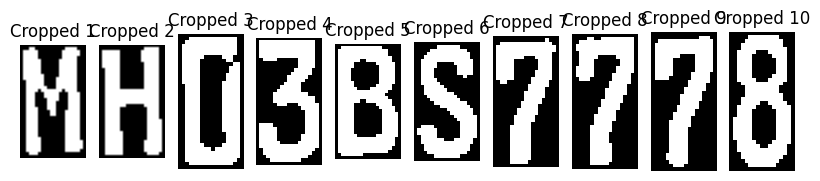

In [ ]:
# menyimpan gambar yang telah dipotong
output_folder = '/content/cropped_images'
os.makedirs(output_folder, exist_ok=True)

# memotong area yang terdeteksi pada gambar
detected_areas = []

# membuat list untuk menyimpan bounding box yang akan digambar
bounding_boxes = []

# menambahkan indeks penghitung
count = 1

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h
    ratio = w / h
    if area > MIN_AREA and w > MIN_WIDTH and h > MIN_HEIGHT and MIN_RATIO < ratio < MAX_RATIO and h > MIN_CHAR_HEIGHT:
        contour_relevant = False
        for label in labels:
            class_name, xmin, ymin, xmax, ymax = label
            if xmin < x < xmax and ymin < y < ymax:
                contour_relevant = True
                break
        if contour_relevant:
            bounding_boxes.append((x, y, w, h))  # Tambahkan bounding box ke dalam list

# Gambar hanya bounding box terluar yang tidak tumpang tindih
for (x, y, w, h) in bounding_boxes:
    is_outer = True
    for (xx, yy, ww, hh) in bounding_boxes:
        if (xx < x) and (yy < y) and (xx + ww > x + w) and (yy + hh > y + h):
            is_outer = False
            break
    if is_outer:
        detected_area = img_processed[y:y+h, x:x+w]  # Cari area yang terdeteksi
        detected_areas.append((x, detected_area))  # Simpan tuple (koordinat x, gambar)

        count += 1  # Tingkatkan indeks penghitung

# Mengurutkan detected_areas berdasarkan posisi x
detected_areas.sort(key=lambda area: area[0])

# Simpan gambar yang telah terdeteksi dengan nama file yang sesuai
for i, (x, area) in enumerate(detected_areas):
    cropped_image_path = os.path.join(output_folder, f'cropped_{i+1}.jpg')
    cv2.imwrite(cropped_image_path, cv2.bitwise_not(area))

# Menampilkan gambar yang telah terpotong
plt.figure(figsize=(10, 8))
for i, (x, area) in enumerate(detected_areas):
    plt.subplot(1, len(detected_areas), i+1)
    plt.imshow(area, cmap='gray')
    plt.axis('off')
    plt.title(f'Cropped {i+1}')  # Ubah judul untuk menunjukkan urutan cropping
plt.show()


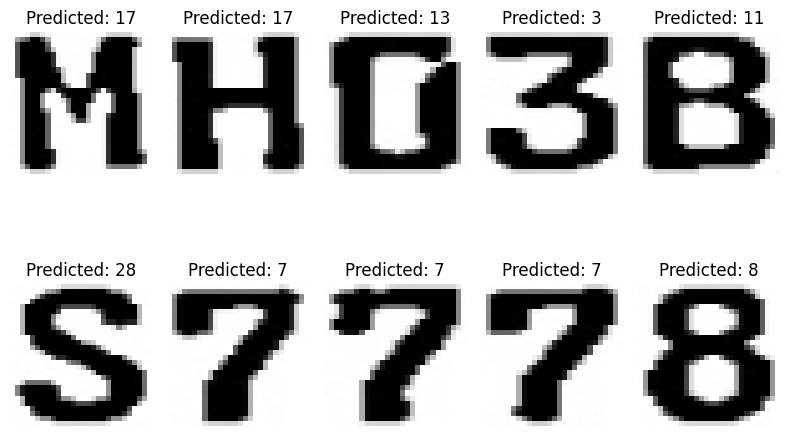

Predicted characters: [17, 17, 13, 3, 11, 28, 7, 7, 7, 8]


In [ ]:
import os

ocr_model = joblib.load('/content/knn_modell.pkl')

import cv2

def read_character_from_image(image_path):
    # Membaca gambar
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Menyesuaikan ukuran gambar menjadi 28x28 piksel
    resized_image = cv2.resize(image, (28, 28))
    # Mengubah gambar menjadi vektor fitur
    feature_vector = resized_image.flatten()
    # Memanggil model KNN untuk memprediksi karakter
    predicted_character = ocr_model.predict([feature_vector])
    return predicted_character[0], resized_image

# loop melalui semua gambar yang disimpan di dalam folder cropped_images
cropped_images_folder = '/content/cropped_images'
predicted_characters = []

image_files = sorted([f for f in os.listdir(cropped_images_folder) if f.endswith('.jpg')], key=lambda x: int(x.split('_')[1].split('.')[0]))

plt.figure(figsize=(8, 6))

# memperbarui jumlah baris dan kolom plot sesuai dengan jumlah gambar yang diprediksi
num_images = len(image_files)
num_rows = (num_images + 4) // 5  # Menentukan jumlah baris
num_cols = min(num_images, 5)  # Menentukan jumlah kolom
for i, filename in enumerate(image_files):
    image_path = os.path.join(cropped_images_folder, filename)
    predicted_character, image = read_character_from_image(image_path)
    predicted_characters.append(predicted_character)

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {predicted_character}')
    plt.axis('off')

plt.tight_layout()
plt.show()
print("Predicted characters:", predicted_characters)

In [ ]:
label_dict = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}

# Konversi output prediksi menjadi karakter berdasarkan label dictionary
predicted_labels = [label_dict[predicted_index] for predicted_index in predicted_characters]
print("Predicted labels:", predicted_labels)

Predicted labels: ['H', 'H', 'D', '3', 'B', 'S', '7', '7', '7', '8']
